In [13]:
from dotenv import load_dotenv
# Load environment variables from .env file
load_dotenv()

from IPython.display import Markdown

# Create analysts

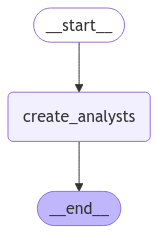

In [3]:
from langgraph.graph import START, END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display

from nodes.analysts import create_analysts, GenerateAnalystsState


# Add nodes and edges 
builder = StateGraph(GenerateAnalystsState)
builder.add_node("create_analysts", create_analysts)
builder.add_edge(START, "create_analysts")
builder.add_edge("create_analysts", END)

memory = MemorySaver()
graph = builder.compile(checkpointer=memory)

# View graph
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [ ]:
# Input
max_analysts = 3 
topic = "The benefits of adopting LangGraph as an agent framework"
thread = {"configurable": {"thread_id": "2"}}

# Run the graph until the first interruption
for event in graph.stream({"topic":topic,"max_analysts":max_analysts,}, thread, stream_mode="values"):
    analysts = event.get('analysts', '')
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)

{'topic': 'The benefits of adopting LangGraph as an agent framework', 'max_analysts': 3}
{'topic': 'The benefits of adopting LangGraph as an agent framework', 'max_analysts': 3, 'analysts': [Analyst(affiliation='Tech Innovations Inc.', name='Dr. Emily Chen', role='AI Research Scientist', description='Dr. Chen focuses on the technical advancements in AI frameworks, particularly how LangGraph enhances agent-based systems through improved natural language processing capabilities.'), Analyst(affiliation='Business Strategy Group', name='Michael Thompson', role='Business Analyst', description='Michael analyzes the market implications of adopting new technologies like LangGraph, emphasizing its potential to streamline operations and improve decision-making in businesses.'), Analyst(affiliation='Open Source Community', name='Sara Patel', role='Community Advocate', description='Sara represents the open-source perspective, discussing the collaborative benefits of LangGraph and how it fosters inn

# Interview

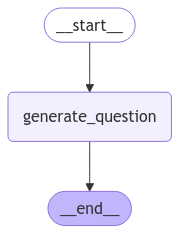

In [16]:
from langgraph.graph import START, END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display

from nodes.interview import generate_question, InterviewState


# Add nodes and edges 
builder = StateGraph(InterviewState)
builder.add_node("generate_question", generate_question)
builder.add_edge(START, "generate_question")
builder.add_edge("generate_question", END)

memory = MemorySaver()
graph = builder.compile(checkpointer=memory)

# View graph
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [24]:
from langchain_core.messages import HumanMessage

# Input
analyst = analysts[0]
messages = [
    HumanMessage(f"So you said you were writing an article on {topic}?")
]
thread = {"configurable": {"thread_id": "7"}}

# Run the graph until the first interruption
for event in graph.stream({"analyst":analyst, "messages": messages}, thread, stream_mode="values"):
    print(event)
    for msg in event.get('messages', []):
        msg.pretty_print()

{'messages': [HumanMessage(content='So you said you were writing an article on The benefits of adopting LangGraph as an agent framework?', additional_kwargs={}, response_metadata={})], 'analyst': Analyst(affiliation='Tech Innovations Inc.', name='Dr. Emily Chen', role='AI Research Scientist', description='Dr. Chen focuses on the technical advancements in AI frameworks, particularly in how LangGraph enhances agent-based systems through improved natural language processing capabilities.')}
================================ Human Message =================================

So you said you were writing an article on The benefits of adopting LangGraph as an agent framework?
{'messages': [HumanMessage(content='So you said you were writing an article on The benefits of adopting LangGraph as an agent framework?', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello! I'm Dr. Emily Chen, and yes, I'm currently exploring the benefits of adopting LangGraph as an agent framework. My 